In [1]:
import  pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded=files.upload()

Saving bank-full.csv to bank-full.csv


In [3]:
df=pd.read_csv('bank-full.csv',sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
from sklearn.preprocessing import OrdinalEncoder

In [7]:
oe=OrdinalEncoder()

In [8]:
char=df.select_dtypes(object).columns

In [9]:
df[char]=oe.fit_transform(df[char])        #change object colm to int in df
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4.0,1.0,2.0,0.0,2143,1.0,0.0,2.0,5,8.0,261,1,-1,0,3.0,0.0
1,44,9.0,2.0,1.0,0.0,29,1.0,0.0,2.0,5,8.0,151,1,-1,0,3.0,0.0
2,33,2.0,1.0,1.0,0.0,2,1.0,1.0,2.0,5,8.0,76,1,-1,0,3.0,0.0
3,47,1.0,1.0,3.0,0.0,1506,1.0,0.0,2.0,5,8.0,92,1,-1,0,3.0,0.0
4,33,11.0,2.0,3.0,0.0,1,0.0,0.0,2.0,5,8.0,198,1,-1,0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9.0,1.0,2.0,0.0,825,0.0,0.0,0.0,17,9.0,977,3,-1,0,3.0,1.0
45207,71,5.0,0.0,0.0,0.0,1729,0.0,0.0,0.0,17,9.0,456,2,-1,0,3.0,1.0
45208,72,5.0,1.0,1.0,0.0,5715,0.0,0.0,0.0,17,9.0,1127,5,184,3,2.0,1.0
45209,57,1.0,1.0,1.0,0.0,668,0.0,0.0,1.0,17,9.0,508,4,-1,0,3.0,0.0


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x=df.iloc[:,:-1]
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4.0,1.0,2.0,0.0,2143,1.0,0.0,2.0,5,8.0,261,1,-1,0,3.0
1,44,9.0,2.0,1.0,0.0,29,1.0,0.0,2.0,5,8.0,151,1,-1,0,3.0
2,33,2.0,1.0,1.0,0.0,2,1.0,1.0,2.0,5,8.0,76,1,-1,0,3.0
3,47,1.0,1.0,3.0,0.0,1506,1.0,0.0,2.0,5,8.0,92,1,-1,0,3.0
4,33,11.0,2.0,3.0,0.0,1,0.0,0.0,2.0,5,8.0,198,1,-1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9.0,1.0,2.0,0.0,825,0.0,0.0,0.0,17,9.0,977,3,-1,0,3.0
45207,71,5.0,0.0,0.0,0.0,1729,0.0,0.0,0.0,17,9.0,456,2,-1,0,3.0
45208,72,5.0,1.0,1.0,0.0,5715,0.0,0.0,0.0,17,9.0,1127,5,184,3,2.0
45209,57,1.0,1.0,1.0,0.0,668,0.0,0.0,1.0,17,9.0,508,4,-1,0,3.0


In [12]:
y=df.iloc[:,-1]

In [13]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=2)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
lg=LogisticRegression()

In [16]:
lg.fit(xtrain,ytrain)

LogisticRegression()

In [17]:
ypred=lg.predict(xtest)

In [18]:
print('act val :',ytest.values[:25])
print('pred val:',ypred[:25])

act val : [0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0.]
pred val: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [19]:
from sklearn.metrics import classification_report

False positives occur when the model predicts a positive outcome, but it is not actually the case. In the context of logistic regression, a false positive would mean predicting that a client has subscribed to a term deposit when they have not. This can lead to inappropriate marketing efforts and additional costs for the bank or financial institution.

In [20]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      9991
         1.0       0.55      0.17      0.27      1312

    accuracy                           0.89     11303
   macro avg       0.73      0.58      0.60     11303
weighted avg       0.86      0.89      0.86     11303



In [21]:
from sklearn.feature_selection import RFE

In [22]:
rfe=RFE(estimator=LogisticRegression())

In [23]:
rfe.fit(x,y)

RFE(estimator=LogisticRegression())

In [24]:
rfe_df = pd.DataFrame(rfe.ranking_).T
rfe_df.columns = x.columns
rfe_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,4,5,1,1,1,9,1,1,1,3,7,6,1,8,1,2


In [25]:
rfe_df = pd.DataFrame({
    'Ranking' : rfe.ranking_,
    'Features' : x.columns
})
rfe_df.sort_values('Ranking')

,Ranking,Features
2,1,marital
3,1,education
4,1,default
6,1,housing
7,1,loan
8,1,contact
12,1,campaign
14,1,previous
15,2,poutcome
9,3,day


In [26]:
from sklearn.tree import DecisionTreeClassifier



In [27]:
dt=DecisionTreeClassifier()

In [28]:
dt.fit(x,y)

DecisionTreeClassifier()

In [29]:
dt.feature_importances_

array([0.09819414, 0.04365518, 0.0182201 , 0.02517788, 0.00198148,
       0.12526319, 0.02262685, 0.00939862, 0.01591156, 0.08834752,
       0.0990073 , 0.29215446, 0.03669189, 0.05443351, 0.01158339,
       0.05735293])

In [30]:
imp_cols = pd.DataFrame({
    'Features' : x.columns,
    'IG' : dt.feature_importances_
})

In [31]:
imp_cols.sort_values('IG',ascending=False)

,Features,IG
11,duration,0.292154
5,balance,0.125263
10,month,0.099007
0,age,0.098194
9,day,0.088348
15,poutcome,0.057353
13,pdays,0.054434
1,job,0.043655
12,campaign,0.036692
3,education,0.025178


In [32]:
#here false positive is more concern therefore increased precision value

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
print(confusion_matrix(ytest,ypred))

[[9807  184]
 [1083  229]]


In [35]:
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,precision_score

In [36]:
proba=lg.predict_proba(xtest)

In [37]:
proba=lg.predict_proba(xtest)[:,1]

In [38]:
auc=roc_auc_score(ytest,proba)

In [39]:
auc

0.8060766885318738

In [40]:
fpr,tpr,thresh=roc_curve(ytest,proba)

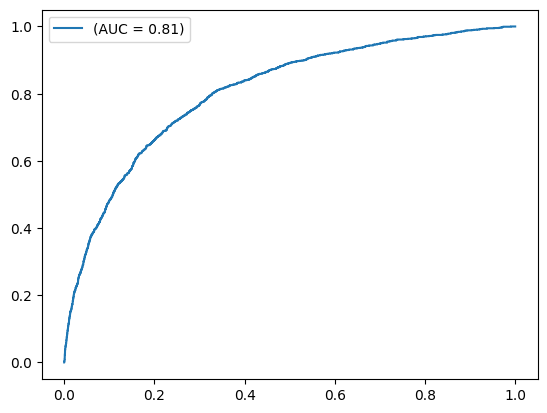

In [41]:
plt.plot(fpr,tpr,label= '(AUC = %0.2f)'%auc)
plt.legend()

In [42]:
accuracy=[]
precision=[]
for i in thresh:
    ypred=np.where(proba>i,1,0)
    accuracy.append(accuracy_score(ytest,ypred))
    precision.append(precision_score(ytest,ypred))

final_thresh=pd.DataFrame({
    'thresh':thresh,
    'accuracy':accuracy,
    'precision':precision
})

In [43]:
final_thresh

,thresh,accuracy,precision
0,1.999862e+00,0.883925,0.000000
1,9.998616e-01,0.883925,0.000000
2,9.994880e-01,0.883925,0.500000
3,9.988488e-01,0.884013,0.666667
4,9.769320e-01,0.884279,0.750000
...,...,...,...
1931,3.804707e-03,0.139874,0.118767
1932,3.744953e-03,0.139786,0.118756
1933,5.107321e-04,0.124746,0.117022
1934,5.075970e-04,0.124657,0.117012


In [44]:
final_thresh.sort_values(by='precision',ascending=False)

,thresh,accuracy,precision
4,9.769320e-01,0.884279,0.750000
26,8.642808e-01,0.886579,0.734375
25,8.757942e-01,0.886313,0.728814
27,8.621449e-01,0.886579,0.727273
24,8.758642e-01,0.886225,0.724138
...,...,...,...
1933,5.107321e-04,0.124746,0.117022
1934,5.075970e-04,0.124657,0.117012
1935,1.083899e-08,0.116164,0.116086
1,9.998616e-01,0.883925,0.000000


In [45]:
from sklearn.preprocessing import binarize

In [46]:
ypred=binarize([proba],threshold=5.831831e-01)[0]

In [47]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94      9991
         1.0       0.60      0.13      0.21      1312

    accuracy                           0.89     11303
   macro avg       0.75      0.56      0.58     11303
weighted avg       0.86      0.89      0.86     11303

